In [69]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\ignsz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [70]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [71]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
import numpy as np
import pandas as pd

bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [73]:
y = pd.DataFrame(boston.target)

In [74]:
for column_idnex in bos.columns:
    bos[column_idnex] -= bos[column_idnex].mean()
    bos[column_idnex] /= bos[column_idnex].std()

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bos,y, test_size=0.2, random_state=1)

In [76]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

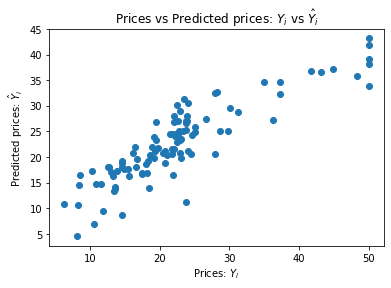

In [78]:
from matplotlib import pyplot as plt
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

How should an ideal scatter look like?

Powienien być linią prostą y = x

In [79]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, Y_pred))

23.38083648027023


In [80]:
reg.score(X_test, y_test)

0.7634174432138472

Check what it is for linear problems.
1. gdy jest równy 1 jest najlepszy
2. gdy jest równy 0 jest najgorszy
W tym przypadku oznacza że ok 76 % przypadków testowych można dobrze przewidywać tym modelem

In [81]:
from sklearn.preprocessing import StandardScaler as SS
bos = pd.DataFrame(boston.data)
scaler = SS()
bos = scaler.fit_transform(bos)

In [82]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
bos = polynomial_features.fit_transform(bos,y)
X_train, X_test, y_train, y_test = train_test_split(bos,y, test_size=0.2, random_state=1)

In [83]:
reg = LinearRegression()
reg.fit(X_train, y_train)
Y_pred = reg.predict(X_test)

In [84]:
print(mse(y_test, Y_pred))
reg.score(X_test, y_test)

8.73470806941043


0.9116165253717271

In [85]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', SS()), ('svc', LinearRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9116236168548879

In [86]:
from sklearn.linear_model import Ridge, Lasso
alphas = np.linspace(0.00001, 1, num=100)
scores_Ridge = []
scores_Lasso = []
for Regularizator, score_store in zip((Ridge, Lasso),(scores_Ridge,scores_Lasso)):
    for alpha in alphas:
        reg = Regularizator(alpha=alpha)
        reg.fit(X_train,y_train)
        score = reg.score(X_test,y_test)
        score_store.append(score)

C:\Users\ignsz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+03, tolerance: 3.264e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ignsz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.896e+01, tolerance: 3.264e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ignsz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

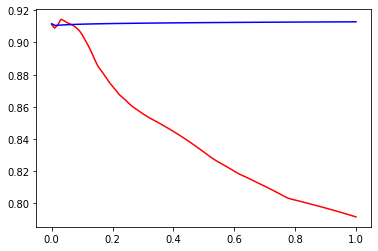

In [87]:
plt.plot(alphas, scores_Lasso,'r')
plt.plot(alphas, scores_Ridge,'b')

In [88]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Ex. 1: Using function .isnull() check wether the database contains missing values.
Please fill the missing values with mean values for giving class.

In [89]:
pd.isnull(data["data"]).any()
# Pozyższa funkcja pokzała że nie ma wartości NULL

False

Ex. 2: Divide the dataset into training and testing. Remove the first column containing the ID of the examined person.

In [90]:
ss = SS()
data["data"] = ss.fit_transform(data["data"])
X_train, X_test, y_train, y_test = train_test_split(data["data"],data["target"], test_size=0.2, random_state=1)

Ex. 3: Using the available libraries in Python, create a logistic regression model with L1 regularization and C = 1 regularization parameter.

In [91]:
reg = Lasso(alpha=1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))

-0.00011644556385537186


In [92]:
alphas = np.linspace(0.0001, 1, num=10)
scores_Ridge = []
for Regularizator, score_store in zip([Ridge], [scores_Ridge]):
    for alpha in alphas:
        reg = Regularizator(alpha=alpha)
        reg.fit(X_train,y_train)
        score = reg.score(X_test,y_test)
        score_store.append(score)


Ex. 4: Draw a plot of the algorithm accuracy for the L2 regularization (10 values of the regularization parameter C in the following range [0.0001; 1])
plt.plot(alphas, scores_Ridge,'b')

Regularization for kNN method

Using the solution from previous lab, please draw a plot for the kNN algorithm's accuracy depending on the value of k. Please indicate the optimal value for k.

In [93]:
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
features_train, features_test, labels_train, labels_test = train_test_split(data["data"],data["target"], test_size=0.2, random_state=1)
def calc_distances(feature, features):
    distances = []
    for train_feat in features:
            dst = distance.euclidean(train_feat, feature)
            distances.append(dst)
    return distances

def get_nearest_neigtbours_and_distances(distances,labels,k):
    dist_lab = list(zip(distances,labels))
    dist_lab.sort(key=lambda x: x[0])
    return dist_lab[:k]

# Użyłem sumy dystansów najbliższych sąsiadów zamiast najczęstszego sąsiada
def sum_labels_distances(labels, dist_lab_sorted):
    keys = set(list(labels))
    label_values = dict.fromkeys(keys,np.Inf)
    for dist_lab in dist_lab_sorted:
        if label_values[dist_lab[1]] is np.Inf:
            label_values[dist_lab[1]] = 0
        label_values[dist_lab[1]] += dist_lab[0]
    return label_values

def calc_label(distances,labels,k):
    dist_lab_sorted = get_nearest_neigtbours_and_distances(distances,labels,k)
    label_values = sum_labels_distances(labels, dist_lab_sorted)
    label = min(label_values, key=label_values.get)
    return label


def calc_labels(features_train, features_test, labels_train,k):
    predicted_labels = []
    for feature in features_test:
        distances = calc_distances(feature, features_train)
        label = calc_label(distances,labels_train,k)
        predicted_labels.append(label)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

scores = []
ks = range(1,21)
for k in ks:
    predicted_labels = calc_labels(features_train, features_test, labels_train,k)
    accuracy_tabele = predicted_labels == labels_test
    score = accuracy_score(labels_test, predicted_labels)
    scores.append(score)

optymalną wartością paramatru k jest 1


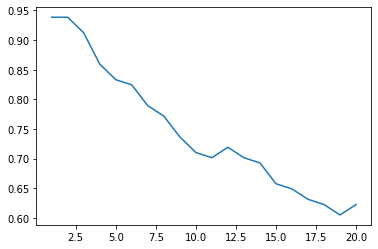

In [94]:
plt.plot(ks, scores)
best_k = ks[np.argmax(scores)]
print(f"optymalną wartością paramatru k jest {best_k}")

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data["data"],data["target"], test_size=0.2, random_state=1)

from sklearn import tree
scores = []
depths = range(1,21)
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

optymalną wartością paramatru depth jest 5


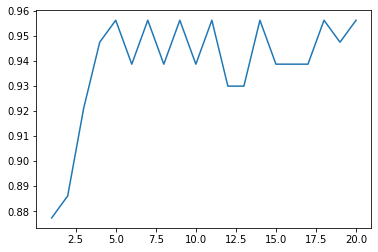

In [96]:
plt.plot(depths,scores)
best_k = depths[np.argmax(scores)]
print(f"optymalną wartością paramatru depth jest {best_k}")